# Лекция 2. Векторы и векторные нормы. Устойчивость алгоритмов

## Что обсудили в прошлый раз

- Форматы представления чисел в компьютере
- Нюансы вычислений с числами в формате плавающей точки
- Накопление ошибок в процессе вычислений
- Алгоритмы суммирования
- Влияние форматов хранения чисел на работу с нейросетями 

## План на сегодня

- Векторы и что с ними можно делать
- Матрицы и что можно делать с ними
- Базовые операции - введение
- Устойчивость алгоритмов: прямая vs обратная
- Нормы для векторов и матриц: как определить, вычислить и где применяются 

## Векторы

- В рамках курса, мы будем работать не с числами, а с векторами
- Вектор в фиксированном базисе размера $n$ может быть представлен как одномерный массив из $n$ чисел.
- Обычно вектор рассматривается, как матрица $n \times 1$, то есть вектор-столбец

**Примеры:** 
- Многочлены степени $\leq n$ образуют линейное пространство.
- Многочлен $ x^3 - 2x^2 + 1$ может быть представлен в виду вектора $\begin{bmatrix}1 \\ -2 \\ 0 \\ 1\end{bmatrix}$ в базисе $\{x^3, x^2, x, 1\}$

In [6]:
import numpy as np

n = 10
xr = np.array(np.random.randn(n), dtype=np.float64)
print(xr)
x = np.ones(n)
print(x)
x = np.zeros(n)
print(x)
x = np.zeros_like(xr)
print(x)
print(x.shape)
print(x @ x)
y = x[:, np.newaxis]
print(y.shape)
print(y.T @ y)

[ 0.35244297 -0.34565308 -0.41707431 -0.78268048 -0.32675677 -2.02271392
  0.41683243  0.17034591  0.41901353 -0.71582572]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(10,)
0.0
(10, 1)
[[0.]]


In [11]:
# import numba
# from numba.typed import List

def naive_scal(x, y):
    val = 0
    for i in range(len(x)):
        val += x[i] * y[i]
    return val


# @jit(nopython=True)
# def naive_scal_numba(x, y):
#     val = 0
#     for i in range(len(x)):
#         val += x[i] * y[i]
#     return val

import random
n = 1000
x = [random.random() for i in range(n)]
y = [random.random() for i in range(n)]
# typed_x = List()
# typed_y = List()
# [typed_x.append(xi) for xi in x]
# [typed_y.append(x) for x in y]
%timeit naive_scal(x, y)
# %timeit naive_scal_numba(typed_x, typed_y)
xnp = np.array(x)
ynp = np.array(y)
%timeit xnp @ ynp

69.5 µs ± 5.34 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
1.24 µs ± 1.64 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


## Векторные нормы

- Векторы обычно содержат приближённое описание физических или каких-нибудь других объектов

- Один из главных вопросов – это насколько приближение точное (1%, 10%)

- Что является достаточно точным представлением объектов, конечно, зависит от конкретного приложения. Например:
    - При решении уравнений в частных производных чаще всего встречается точность порядка $10^{-5} - 10^{-10}$
    - Текущие приложения нейросетей к решению уравнений в частных производных часто дают точность $10^{-3} - 10^{-4}$. Графики ниже из [этой](https://arxiv.org/pdf/2006.11894.pdf) работы
    <img src="pinns_loss.png">
    - В приложениях, связанных с обработкой данных, иногда точность порядка $80\%$ приемлема при серьёзном зашумлении исходных данных.

## Расстояния и нормы

- Норма – это количественная мера малости вектора, обычно обознается как $\Vert x \Vert$.

Норма должна удовлетворять следующим свойствам:

- $\Vert \alpha x \Vert = |\alpha| \Vert x \Vert$
- $\Vert x + y \Vert \leq \Vert x \Vert + \Vert y \Vert$ (неравенство треугольника)
- Если $\Vert x \Vert = 0$, то $x = 0$

Расстояние между двумя векторами можно определить как норму разности между ними

$$
   d(x, y) = \Vert x - y \Vert.
$$

## Стандартные нормы

Наиболее известная и чаще всего используемая норма – это **евклидова норма**:

$$\Vert x \Vert_2 = \sqrt{\sum_{i=1}^n |x_i|^2},$$

расстояние, по которой соответствует расстоянию в реальном мире. Если векторы состоят из комплексных чисел, используются их модули.

- $j^2 = -1$
-  $x_i = a + jb$
- $\bar{x}_i = a - jb$
- $|x_i|^2 = \bar{x}_i x_i = a^2 + b^2$

## $p$-норма

Евклидова норма или $2$-норма – это частный случай важного класса $p$-норм:

$$
 \Vert x \Vert_p = \Big(\sum_{i=1}^n |x_i|^p\Big)^{1/p}.
$$

Также важны следующие два частных случая :
- Бесконечная норма или Чебышёвская норма определяется как максимальный модуль элемента вектора $x$: 

$$
\Vert x \Vert_{\infty} = \max_i | x_i|
$$

<img src="chebyshev.jpeg" style="height">

- $L_1$ норма определяется как сумма модулей элементов вектора $x$: 

$$
\Vert x \Vert_1 = \sum_i |x_i|
$$

Расстояние, определённое как $L_1$ норма разности между векторами, называется **Манхэттенским расстоянием**

<img src="manhattan.jpeg" style="height">  


## Эквивалентность норм

Все нормы эквивалентны в следующем смысле

$$
   C_1 \Vert x \Vert_* \leq  \Vert x \Vert_{**} \leq C_2 \Vert x \Vert_*
$$  

для некоторых положительных констант $C_1(n), C_2(n)$, $x \in \mathbb{R}^n$ для любых пар норм $\Vert \cdot \Vert_*$ и $\Vert \cdot \Vert_{**}$. Эквивалентность норм означает, что если некоторый вектор мал в одной норме, то он мал и в другой норме. Однако константы могут быть большими.

## Вычисление норм в Python

Пакет NumPy содержит всё необходимое для вычисления норм: функция ```np.linalg.norm```.


In [12]:
import numpy as np
n = 100
a = np.ones(n)
b = a + 1e-3 * np.random.randn(n)
print('Relative error in L1 norm:', np.linalg.norm(a - b, 1) / np.linalg.norm(b, 1))
print('Relative error in L2 norm:', np.linalg.norm(a - b) / np.linalg.norm(b))
print('Relative error in Chebyshev norm:', np.linalg.norm(a - b, np.inf) / np.linalg.norm(b, np.inf))

Relative error in L1 norm: 0.0008439308325114425
Relative error in L2 norm: 0.0010230258411658192
Relative error in Chebyshev norm: 0.003048896972493597


## Единичные диски в различных нормах

- Единичный диск – это множество точек такое что $\Vert x \Vert \leq 1$
- Для евклидовой нормы единичный диск сопадает с обычным диском
- Для других норм единичный диск сильно отличается от привычного нам диска

Text(0.5, 1.0, 'Unit disk in the p-th norm, $p=2$')

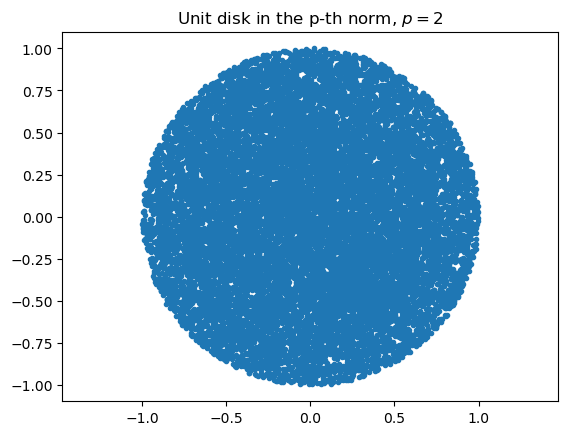

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
p = 2 # Which norm do we use
M = 40000 # Number of sampling points
a = np.random.randn(M, 2)
b = []
for i in range(M):
    if np.linalg.norm(a[i, :], p) <= 1:
        b.append(a[i, :])
b = np.array(b)
plt.plot(b[:, 0], b[:, 1], '.')
plt.axis('equal')
plt.title('Unit disk in the p-th norm, $p={0:}$'.format(p))

## Почему $L_1$ норма может быть важна?

$L_1$ норма играет важную роль в задаче **compressed sensing**. 

Простейшая формулировка этой задачи следующая:

- Даны некоторые наблюдения $f$ 
- Известно, что модель получения наблюдений линейная $Ax = f$, где $A$ – это $n \times m$ известная матрица
- Число уравнений $n$ меньше, чем число неизвестных $m$

**Q**: можем ли мы найти решение такой системы?

Решение, очевидно, не единственно, поэтому естественный подход – это искать решение минимальное в некотором смысле:

\begin{align*}
& \Vert x \Vert \rightarrow \min_x \\
\mbox{subject to } & Ax = f
\end{align*}

- Выбор стандартной евклидовой нормы $\Vert x \Vert = \Vert x \Vert_2$ приводит к **линейной задаче наименьших квадратов**  

- Выбор первой нормы $\Vert x \Vert = \Vert x \Vert_1$ приводит к задаче [**compressed sensing**](https://en.wikipedia.org/wiki/Compressed_sensing)
- Обычно решение этой задачи является наиболее **разреженным** (sparse) решением данной системы 
- Basis pursuit - eщё одно название задачи 

\begin{align*}
& \Vert x \Vert_1 \rightarrow \min_x \\
\mbox{s.t. } & Ax = f
\end{align*}


### Условие RIP

- s-restricted isometry property (RIP) выполнено для матрицы $A \in \mathbb{R}^{m \times n}$, если существует $\delta_s \in (0, 1)$ такая что для любой подматрицы $A_s \in \mathbb{R}^{m \times s}$ выполнено

$$ (1 - \delta_s)\|y\|_2^2 \leq \|A_s y\|_2^2 \leq (1 + \delta_s) \|y\|_2^2  $$

- Показано, что с высокой вероятностью такое условие выполнено для случайных матриц

- Связь между RIP-условием и решением задачи минимизации $\ell_1$-нормы показана [тут](https://onlinelibrary.wiley.com/doi/abs/10.1002/cpa.20124?casa_token=Oi_lDpUt4nYAAAAA:IPceNxxhCcFEth6EuuDJO-YVfg5xJmT4xUmTLZDkoL02aYzg2SMcAV13dJAkA11WWw3xmThkoYcHZGlr)

                                     CVXPY                                     
                                     v1.2.2                                    
(CVXPY) Sep 16 09:59:15 PM: Your problem has 20 variables, 1 constraints, and 0 parameters.
(CVXPY) Sep 16 09:59:15 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Sep 16 09:59:15 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Sep 16 09:59:15 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Sep 16 09:59:15 PM: Compiling problem (target solver=MOSEK).
(CVXPY) Sep 16 09:59:15 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -

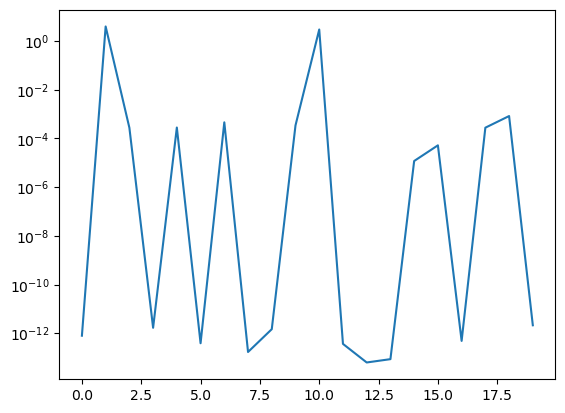

In [86]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt

n = 10
A = np.random.randn(n, 2*n)
# x_true = np.random.randn(2*n)
x_true = np.zeros(2*n)
x_true[1] = -4
x_true[10] = 3
eps = 1e-3
b = A @ x_true + eps * np.random.randn(n)

x = cp.Variable(2*n)
problem = cp.Problem(cp.Minimize(cp.norm(x, 1)), [A @ x == b])
problem.solve(verbose=True)
print(x.value)
plt.plot(abs(x.value))
plt.yscale("log")
x_approx = x.value.copy()
x_approx[np.abs(x_approx) < 1e-3] = 0
print(np.sum(x_approx != 0))
print(x_approx)
print(np.linalg.norm(A @ x_approx - b))

## Всегда ли минимизация $\ell_1$-нормы будет давать разреженное решение?

In [46]:
import cvxpy as cp
import numpy as np

n = 10
A = np.zeros((n, n+2))
eps = 1e-6
A[:, 2:] = np.eye(n)
A[:, 0] = eps / 2
A[0, 0] += 1
A[1, 0] += -1
A[:, 1] = eps / 2
A[1, 1] += 1
A[0, 1] += -1
b = np.ones(n)
print(A)

x = cp.Variable(n+2)
problem = cp.Problem(cp.Minimize(cp.norm(x, 1)), [A @ x == b])
problem.solve()
print(x.value)
print(np.linalg.norm(x.value, 1))
x_sparse = np.zeros(n+2)
x_sparse[0] = 1 / eps
x_sparse[1] = 1 / eps
print(np.linalg.norm(A @ x_sparse - b))
print(np.linalg.norm(x_sparse, 1))
A[:, 1] @ b

[[ 1.0000005e+00 -9.9999950e-01  1.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [-9.9999950e-01  1.0000005e+00  0.0000000e+00  1.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 5.0000000e-07  5.0000000e-07  0.0000000e+00  0.0000000e+00
   1.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 5.0000000e-07  5.0000000e-07  0.0000000e+00  0.0000000e+00
   0.0000000e+00  1.0000000e+00  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 5.0000000e-07  5.0000000e-07  0.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  1.0000000e+00  0.0000000e+00
   0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 5.0000000e-07  5.0000000e-07  0.0000000e+00  0.0000000e+00
   

5.0000000000287555e-06

## Что такое устойчивый алгоритм?

Введём понятия **устойчивости** алгоритма.

- Пусть $x$ некоторый объект, с которым производят операции (например, вектор)
- Пусть $y = f(x)$ функция от этого объекта, которую необходимо вычислить, $y$ - точное значение
- Пусть $\hat{y} = alg(x)$ результат вычисления функции $f$ с помощью алгоритма $alg$, который вносит ошибку в результат.

Теперь определим два типа ошибок: прямую и обратную.

- Прямой ошибкой вычисления $\hat{y}$ будем называть число $\left| \frac{\hat{y} - y}{y} \right|$

- Обратной ошибкой для $\hat{y}$ будем называть величину 

$$ \min_{\Delta x} \frac{\| \Delta x \|}{ \|x \|} :\quad \hat{y} = f(x + \Delta x)$$ 

- Алгоритм alg называется **backward stable**, если обратная ошибка всегда мала относительно машинной точности

- Если алгоритм backward stable, то это означает, что ошибки порождённые им соразмерны с погрешностями входных данных

<img src="./alg_stable.png" width=700>

Диаграмма взята [отсюда](https://nhigham.com/2020/08/04/what-is-numerical-stability/)

- Прямая и обратная ошибка связаны соотношением

$$ \left| \frac{\hat{y} - y}{y} \right| \leq cond_f(x) \frac{\| \Delta x \|}{ \|x \|}, $$

где 

$$ cond_f(x) = \lim_{\varepsilon \to 0} \sup_{\| \Delta x \| \leq \varepsilon \|x\|} \frac{|f(x + \Delta x) - f(x)|}{\varepsilon |f(x)|} $$

число обусловленности отображения $f$

- Алгоритм называется **forward stable** если это соотношение справедливо для любого входного аргумента $x$.

- Для линейных отображений получим замкнутое выражение для числа обусловленности матрицы позднее в курсе

- Если алгоритм является **backward stable**, то он и **forward stable**.

- Контрпример для обратного следствия далее...

## Классический пример

Классическим примером для демонстрации (не)устойчивости алгоритма является задача решения системы линейных уравнений с помощью метода Гаусса, который связан с вычислением LU разложения матрицы (подробности будут далее).

Рассмотрим **матрицу Гильберта** с элементами

$$A = \{a_{ij}\}, \quad a_{ij} = \frac{1}{i + j + 1}, \quad i,j = 0, \ldots, n-1.$$

и соответствующую линейную систему с этой матрицей

$$Ax = f.$$

- Попробуем решить эту систему с помощью встроенной функции ```np.linalg.solve``` 
- Вычислим норму невязки $\|A\hat{x} - f\|_2$
- Связь между нормой невязки и обратной ошибкой мы обсудим в лекции про линейные системы...

In [84]:
import numpy as np
n = 100
a = [[1.0/(i + j + 1) for i in range(n)] for j in range(n)] # Hilbert matrix
A = np.array(a)
rhs =  np.random.random(n)
sol = np.linalg.solve(A, rhs)
print(np.linalg.norm(z - ))
print(np.linalg.norm(A.dot(sol) - rhs)/np.linalg.norm(rhs))
#plt.plot(sol)

18
36.56812005949078


In [85]:
rhs =  np.ones(n)
sol = np.linalg.solve(A, rhs)
print(np.linalg.norm(A.dot(sol) - rhs)/np.linalg.norm(rhs))
#plt.plot(sol)

1.4706170310348663e-07


## Отсутствие обратной устойчивости в нейросетях

- Анализ обратных ошибок и их использование для построения состязательных атак (adversarial attacks) рассмотрено [тут](https://ut3-toulouseinp.hal.science/hal-03296180/document)
- Если нейросеть обладает обратной устойчивостью, то её сложнее атаковать
- Это повышает уверенность в её безопаности и надёжности

## Другие примеры неустойчивости

Какой вычислительно устойчивый способ вычисления следующих функций?

- $\log(1 - \tanh^2(x))$
- $SoftMax(x)_j = \dfrac{e^{x_j}}{\sum\limits_{i=1}^n e^{x_i}}$  

In [27]:
u = 300
eps = 1e-6
print("Original function:", np.log(1 - np.tanh(u)**2))
eps_add = np.log(1 - np.tanh(u)**2 + eps)
print("Attempt imporove stability with add small constant:", eps_add)
print("Use more numerically stable form:", np.log(4) - 2 * np.log(np.exp(-u) + np.exp(u)))

Original function: -inf
Attempt imporove stability with add small constant: -13.815510557964274
Use more numerically stable form: -598.6137056388801


/var/folders/r2/8fwp8hwn29q_slh9d8yh34gc0000gn/T/ipykernel_6817/325375971.py:3: RuntimeWarning: divide by zero encountered in log
  print("Original function:", np.log(1 - np.tanh(u)**2))


In [28]:
n = 5
x = np.random.randn(n)
x[0] = 1000
print(np.exp(x) / np.sum(np.exp(x)))
print(np.exp(x - np.max(x)) / np.sum(np.exp(x - np.max(x))))

[nan  0.  0.  0.  0.]
[1. 0. 0. 0. 0.]


/var/folders/r2/8fwp8hwn29q_slh9d8yh34gc0000gn/T/ipykernel_6817/3690536116.py:4: RuntimeWarning: overflow encountered in exp
  print(np.exp(x) / np.sum(np.exp(x)))
/var/folders/r2/8fwp8hwn29q_slh9d8yh34gc0000gn/T/ipykernel_6817/3690536116.py:4: RuntimeWarning: invalid value encountered in true_divide
  print(np.exp(x) / np.sum(np.exp(x)))


## Резюме

- Векторные нормы: $1$, $p$ и евклидова норма 
- $L_1$ норма как спопособ получить разреженное решение, задача compressed sensing
- Прямая (forward) и обратная (backward) устойчивость алгоритмов